In [9]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
import csv
import torch
fileName = 'data/loan_data.csv'

with open(fileName) as csvFile:
    reader = csv.reader(csvFile)
    variables = next(reader)
    columnInfo = [[] for _ in range(len(variables))]
    data = torch.tensor([])
    labels = torch.tensor([])
    for row in reader:
        temp = torch.zeros(1, len(variables) - 1)
        for columnIndex, column in enumerate(row[:-1]):
            try:
                value = float(column)
            except ValueError:
                if column not in columnInfo[columnIndex]:
                    columnInfo[columnIndex].append(column)
                value = columnInfo[columnIndex].index(column)
            if value != 0:
                value = value ** -1
            temp[0][columnIndex] = value
        data = torch.cat((data, temp))
        labels = torch.cat((labels, torch.tensor([int(row[-1])])))
labels = labels
data.shape, labels.shape

(torch.Size([45000, 13]), torch.Size([45000]))

In [11]:
import pandas as pd
df = pd.DataFrame(data)
df = df.set_axis(variables[:-1], axis=1)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,0.045455,0.0,0.000000,0.000014,0.000000,0.0,0.000029,0.00,0.062422,2.040816,0.333333,0.001783,0.0
1,0.047619,0.0,1.000000,0.000081,0.000000,1.0,0.001000,1.00,0.089767,12.500000,0.500000,0.001984,1.0
2,0.040000,0.0,1.000000,0.000080,0.333333,0.5,0.000182,0.50,0.077700,2.272727,0.333333,0.001575,0.0
3,0.043478,0.0,0.500000,0.000013,0.000000,0.0,0.000029,0.50,0.065660,2.272727,0.500000,0.001481,0.0
4,0.041667,1.0,0.000000,0.000015,1.000000,0.0,0.000029,0.50,0.070077,1.886792,0.250000,0.001706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.037037,1.0,0.333333,0.000021,0.166667,0.0,0.000067,0.50,0.063857,3.225806,0.333333,0.001550,0.0
44996,0.027027,0.0,0.333333,0.000015,0.058824,0.0,0.000111,0.25,0.071073,7.142857,0.090909,0.001610,0.0
44997,0.030303,1.0,0.333333,0.000018,0.142857,0.0,0.000361,0.20,0.099800,20.000000,0.100000,0.001497,0.0
44998,0.034483,1.0,0.500000,0.000030,0.250000,0.0,0.000083,1.00,0.075586,2.777778,0.166667,0.001656,0.0


In [12]:
pct = .8
XSplit = int(pct*len(data))
ySplit = int(pct * len(labels))
XTrain, XTest = data[:XSplit].to(device), data[XSplit:].to(device)
yTrain, yTest = labels[:ySplit].to(device), labels[ySplit:].to(device)
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

(torch.Size([36000, 13]),
 torch.Size([9000, 13]),
 torch.Size([36000]),
 torch.Size([9000]))

In [13]:
XTrain[0:5], yTrain[0:5]

(tensor([[4.5455e-02, 0.0000e+00, 0.0000e+00, 1.3899e-05, 0.0000e+00, 0.0000e+00,
          2.8571e-05, 0.0000e+00, 6.2422e-02, 2.0408e+00, 3.3333e-01, 1.7825e-03,
          0.0000e+00],
         [4.7619e-02, 0.0000e+00, 1.0000e+00, 8.1420e-05, 0.0000e+00, 1.0000e+00,
          1.0000e-03, 1.0000e+00, 8.9767e-02, 1.2500e+01, 5.0000e-01, 1.9841e-03,
          1.0000e+00],
         [4.0000e-02, 0.0000e+00, 1.0000e+00, 8.0399e-05, 3.3333e-01, 5.0000e-01,
          1.8182e-04, 5.0000e-01, 7.7700e-02, 2.2727e+00, 3.3333e-01, 1.5748e-03,
          0.0000e+00],
         [4.3478e-02, 0.0000e+00, 5.0000e-01, 1.2539e-05, 0.0000e+00, 0.0000e+00,
          2.8571e-05, 5.0000e-01, 6.5660e-02, 2.2727e+00, 5.0000e-01, 1.4815e-03,
          0.0000e+00],
         [4.1667e-02, 1.0000e+00, 0.0000e+00, 1.5121e-05, 1.0000e+00, 0.0000e+00,
          2.8571e-05, 5.0000e-01, 7.0077e-02, 1.8868e+00, 2.5000e-01, 1.7065e-03,
          0.0000e+00]], device='cuda:0'),
 tensor([1., 0., 1., 1., 1.], device='cuda:0')

In [14]:
from torch import nn
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(13, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
        return self.layer3(self.layer2(self.layer1(x)))


def accuracy(targets, predictions):
    correct = torch.eq(targets, predictions).sum().item()
    acc = correct / len(targets)
    return acc

model = Model0().to(device)
lossFun = nn.BCEWithLogitsLoss()
losses = torch.tensor([])
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
epochs = 10500
for epoch in range(epochs):
    model.train()
    yLogits = model(XTrain).squeeze()
    yPred = torch.round(torch.sigmoid(yLogits))

    trainLoss = lossFun(yLogits, yTrain)
    losses = torch.cat((losses, trainLoss.unsqueeze(-1).to('cpu')))

    optimizer.zero_grad()
    trainLoss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        testLogits = model(XTest).squeeze()
        testPred = torch.round(torch.sigmoid(testLogits))
        
        testLoss = lossFun(testLogits, yTest)
        testAcc = accuracy(yTest, testPred)
    if epoch % 100 == 0:
        print(f'Epoch: {epoch:>5} | Train loss: {trainLoss:.4f} | Test loss: {testLoss:.4f}  | Test acc: {testAcc*100:.4f}%')

Epoch:     0 | Train loss: 0.6355 | Test loss: 0.7310  | Test acc: 67.8667%
Epoch:   100 | Train loss: 0.3765 | Test loss: 0.5110  | Test acc: 67.8667%
Epoch:   200 | Train loss: 0.4015 | Test loss: 0.4090  | Test acc: 81.9444%
Epoch:   300 | Train loss: 0.3745 | Test loss: 0.3785  | Test acc: 83.1222%
Epoch:   400 | Train loss: 0.3569 | Test loss: 0.3639  | Test acc: 83.2222%
Epoch:   500 | Train loss: 0.3451 | Test loss: 0.3555  | Test acc: 83.3333%
Epoch:   600 | Train loss: 0.3368 | Test loss: 0.3501  | Test acc: 83.4333%
Epoch:   700 | Train loss: 0.3305 | Test loss: 0.3463  | Test acc: 83.4444%
Epoch:   800 | Train loss: 0.3256 | Test loss: 0.3435  | Test acc: 83.4889%
Epoch:   900 | Train loss: 0.3217 | Test loss: 0.3414  | Test acc: 83.4778%
Epoch:  1000 | Train loss: 0.3185 | Test loss: 0.3398  | Test acc: 83.4556%
Epoch:  1100 | Train loss: 0.3159 | Test loss: 0.3385  | Test acc: 83.5222%
Epoch:  1200 | Train loss: 0.3136 | Test loss: 0.3375  | Test acc: 83.5333%
Epoch:  1300

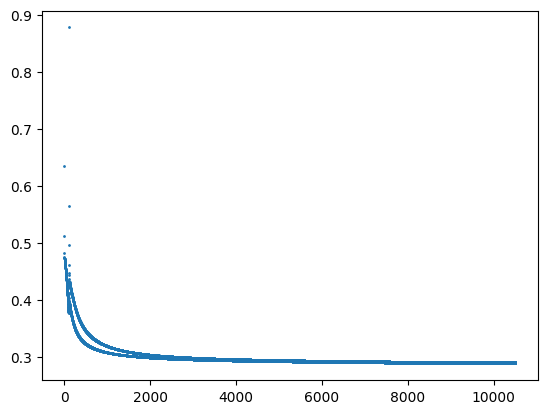

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(np.arange(len(losses), step=1), torch.detach(losses), 1)

In [16]:
# problems
# I didn't know how to find the data
# getting the data from the csv was a hassle
# had to use reciprocals to make the numbers smaller.
# not enough epochs
# 0.1 lr worked, but the learning rate only got up to 80. 
# I had a faulty accuracy function
# non-linear layers did not help (relu)
# issues with devices and converting to numpy for matplotlib